In [1]:
date()

[1] "Tue Jan 19 16:29:26 2021"

# Nested variants

|   | bb | Bb | BB |
| -- | ---| ---| -- |
| aa | aabb | ~~aaBb~~ | ~~aaBB~~ |
| Aa | Aabb | AaBb | ~~AaBB~~ | 
| AA | AAbb | AABb | AABB | 

- Regulatory variant $V_r$ frequencies:
    - $f(a) = p$
    - $f(A) = q$
    - such that $f(a) + f(A) = p + q = 1$
- Coding variant $V_c = B$ arises on the background of regulatory variant $V_r = A$ with frequencies: 
    - $f(b) = r$
    - $f(B) = s$
    - such that $f(b) + f(B) = r + s = 1$, and therefore $qr + qs = q(r + s) =q $

## Haplotypes

Let $U$ denote the gene expression from this haplotype

$ab$: `---------------`  
$f(ab) = p$  
$U(ab) = e$


$Ab$: `---*-----------`  
$f(Ab) = qr$  
$U(Ab) = \alpha$

$AB$: `---*-------*---`  
$f(AB) = qs $  
$U(AB) = 0$

(Note, haplotype $aB$ does not exist in this scenario)

## Genotypes

1. $f(aabb) = p^2 $  
$U = 2e$
```
ab ---------------
ab ---------------
```

2. $f(Aabb) = 2(qr)(p) $  
$U = (1 + \alpha) * e$
```
Ab ---*-----------
ab ---------------
```

3. $f(AAbb) = (qr)^2 $  
$U = 2 \alpha * e$
```
Ab ---*-----------
Ab ---*-----------
```

4. $f(AaBb) = 2(qs)p $  
$U = e$
```
AB ---*-------*---
ab ---------------
```

5. $f(AABb) = 2(qs)(qr) = 2q^2rs $  
$U = \alpha * e$
```
AB ---*-------*---
Ab ---*-----------
```

6. $f(AABB) = (qs)^2 $  
$U = 0$
```
AB ---*-------*---
AB ---*-------*---
```

The above haplotype frequencies satisfy the condition:

$$
\begin{align}
&f(aabb) + f(Aabb) + f(AAbb) + f(AaBb) + f(AABb) + f(AABB) \\
&= p^2 + 2(qr)(p) + (qr)^2 + 2(qs)p + 2(qs)(qr) + (qs)^2 \\
&= p^2 + 2qp(\underbrace{r + s}_{=1}) + q^2(\underbrace{s^2 + 2sr + r^2}_{=1}) \\
&= p^2 + 2pq + q^2 \\
&= 1
\end{align}
$$

by HWE

# Un-nested variants

|   | bb | Bb | BB |
| -- | ---| ---| -- |
| aa | aabb | aaBb | aaBB |
| Aa | Aabb | AaBb | ~~AaBB~~ | 
| AA | AAbb | ~~AABb~~ | ~~AABB~~ | 

- Regulatory variant $V_r$ frequencies:
    - $f(a) = p$
    - $f(A) = q$
    - such that $f(a) + f(A) = p + q = 1$
- Coding variant $V_c$ arises on the background of wildtype regulatory variant $V_r = a$ with frequencies: 
    - $f(b) = r$
    - $f(B) = s$
    - such that $f(b) + f(B) = r + s = 1$, and therefore $pr + ps = p(r + s) = p $

## Haplotypes

Let $U$ denote the gene expression from this haplotype

$ab$: `---------------`  
$f(ab) = pr$  
$U(ab) = e$

$aB$: `-----------*---`  
$f(AB) = ps$  
$U(AB) = 0$

$Ab$: `---*-----------`  
$f(Ab) = q$  
$U(Ab) = \alpha$

(Note, haplotype $AB$ does not exist in this scenario)

## Genotypes

1. $f(aabb) = (pr)^2 $  
$U = 2e$
```
ab ---------------
ab ---------------
```

2. $f(Aabb) = 2(qr)(p) $  
$U = (1 + \alpha) * e$
```
Ab ---*-----------
ab ---------------
```

3. $f(AAbb) = q^2 $  
$U = 2 \alpha * e$
```
Ab ---*-----------
Ab ---*-----------
```

4. $f(aaBb) = 2(ps)(pr)$  
$U = (1 + 0) * e$
```
aB -----------*---
ab ---------------
```

5. $f(AabB) = 2(qs)p $  
$U = \alpha * e$
```
Ab ---*-----------
aB -----------*---
```

6. $f(AABB) = (ps)^2 $  
$U = 0$
```
AB -----------*---
AB -----------*---
```

The above haplotype frequencies satify the condition:

$$
\begin{align}
& f(aabb) + f(Aabb) + f(AAbb) + f(aaBb) + f(AabB) + f(AABB) \\
&= (pr)^2 + 2pqr + q^2 + 2p^2 rs + 2qsp + (ps)^2 \\
&= 2pq(\underbrace{r + s}_{=1}) + p^2 (\underbrace{r^2 + 2rs + s^2}_{=1}) + q^2 \\
&= p^2 + 2pq + q2 \\
&= 1
\end{align}
$$

by HWE

# Fitness

If we say that fitness is directly related to gene expression $U$, then we can calculate population fitness as

$$ U_{pop} = \sum f(g) * U(g) $$

where $g$ is the genotype

We can implement this in `R` as:

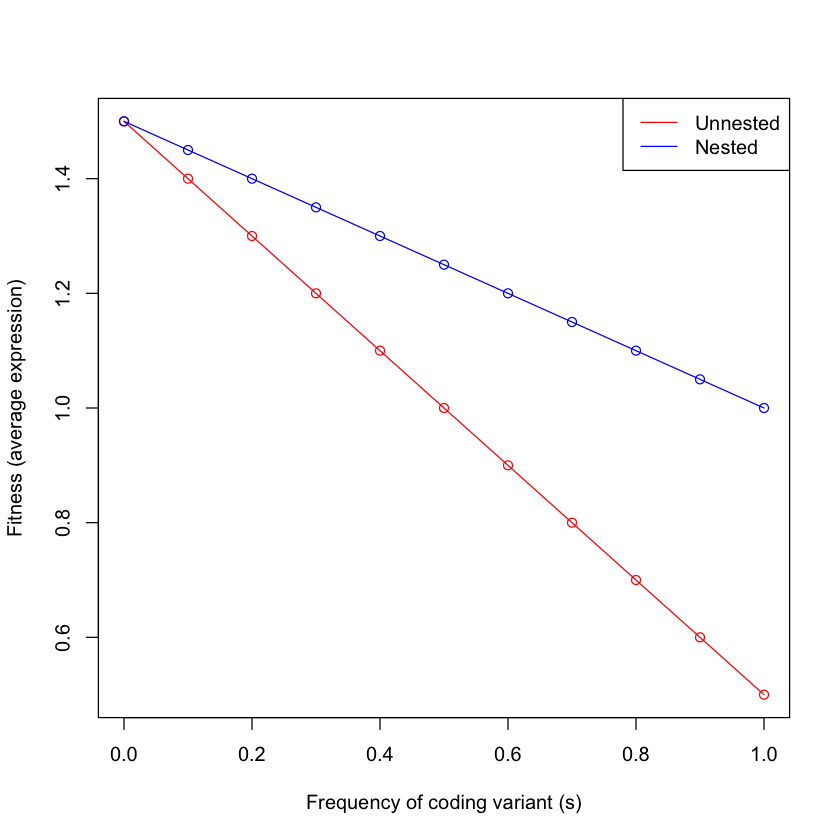

In [1]:
baseline <- 1
alpha <- 0.5
beta <- 0

p <- 0.5
q <- 1-p
r <- seq(0,1,0.1)
s <- 1 - r

# nested variants
f_nested <-
    p^2 * (1 + 1) * baseline +
    2 * p * q * r * (1 + alpha) * baseline +
    q^2 * r^2 * (alpha + alpha) * baseline+
    2 * p * q * s * (1 + alpha * beta) * baseline +
    2 * q^2 * r * s * (alpha + alpha * beta) * baseline +
    (q*s)^2 * (alpha * beta + alpha * beta) * baseline
# f_nested

# unnested
f_unnested <-
    (p*r)^2 * (1 + 1) * baseline +
    2 * p * r * q * (1 + alpha) * baseline +
    q^2 * (alpha + alpha) * baseline +
    2 * p^2 * r * s * (1 + beta) * baseline +
    2 * q * p * s * (alpha + beta) * baseline +
    (p*s)^2 * (beta + beta) * baseline
# f_unnested

plot(s, f_unnested, type='o', col='red', ylab='Fitness (average expression)', xlab='Frequency of coding variant (s)')
points(s, f_nested, type='o', col='blue')
legend('topright', legend=c("Unnested", "Nested"), col=c('red', 'blue'), lty=1)
abline(h=2, lty=2)

# Scratch

Sandbox, ignore this section

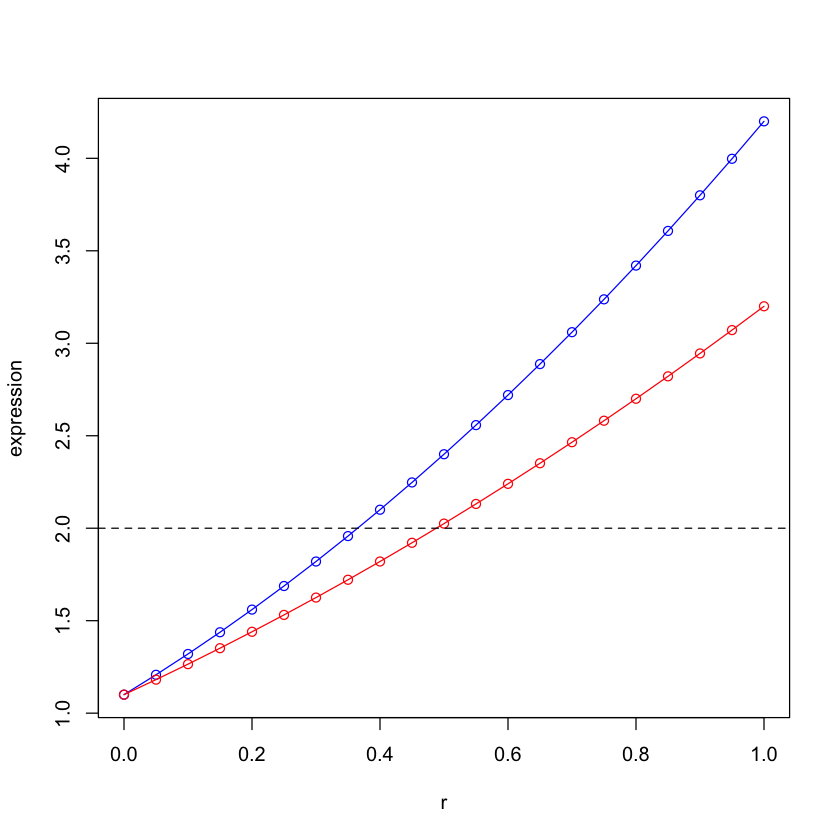

In [156]:
baseline <- 1
alpha <- 0.5
beta <- 0.5

p <- 0.10
q <- 1 - p
r <- seq(0,1,0.05)

f_nested <-
    p^2 * (1 + 1) * baseline +
    2 * p * q * (1 + alpha) * baseline +
    q^2 * (alpha + alpha) * baseline +
    2 * p * r * (1 + alpha * beta) * baseline +
    2 * q * r * (alpha + alpha * beta) * baseline +
    r^2 * (alpha * beta + alpha * beta) * baseline

# unnested
f_unnested <-
    p^2 * (1 + 1) * baseline +
    2 * p * q * (1 + alpha) * baseline +
    q^2 * (alpha + alpha) * baseline +
    2 * p * r * (1 + beta) * baseline +
    2 * q * r * (alpha + beta) * baseline +
    r^2 * (beta + beta) * baseline

plot(r, f_unnested, type='o', col='blue', ylab='expression')
points(r, f_nested, type='o', col='red')
abline(h=2, lty=2)